In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os 
print(os.getcwd())

/Users/vamshisamudrala/Projects/BankLoan_SVM Classification


In [4]:
data = pd.read_csv('/Users/vamshisamudrala/Projects/BankLoan_SVM Classification/UniversalBank.csv')

In [5]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [13]:
data = data.drop(columns = ['ID','ZIP Code'])

In [14]:
data.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


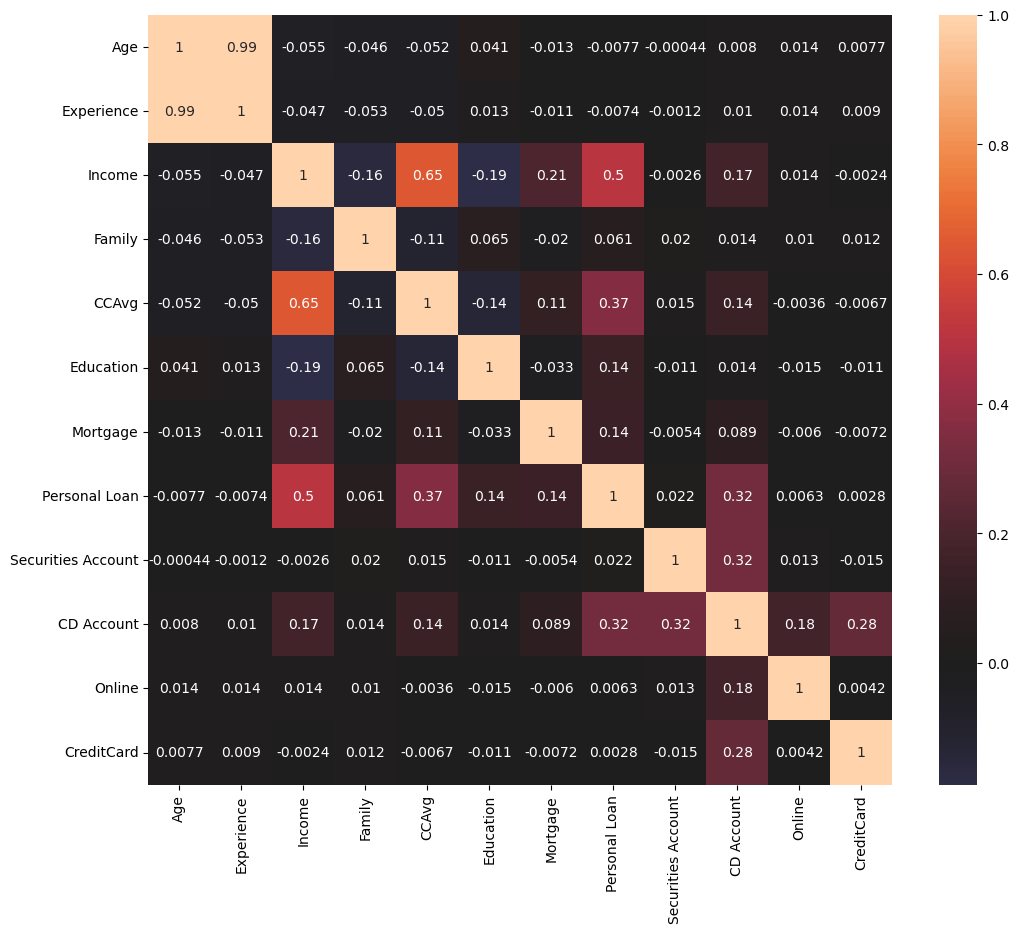

In [16]:
plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), annot = True, center = 0)
plt.show()

<Axes: xlabel='CreditCard', ylabel='count'>

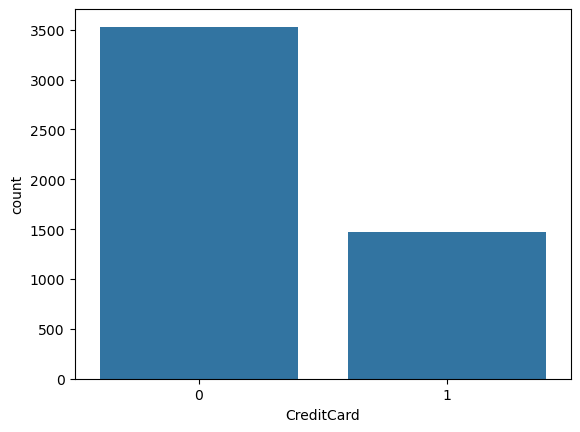

In [18]:
sns.countplot(data = data, x = 'CreditCard')

<Axes: xlabel='Family', ylabel='Income'>

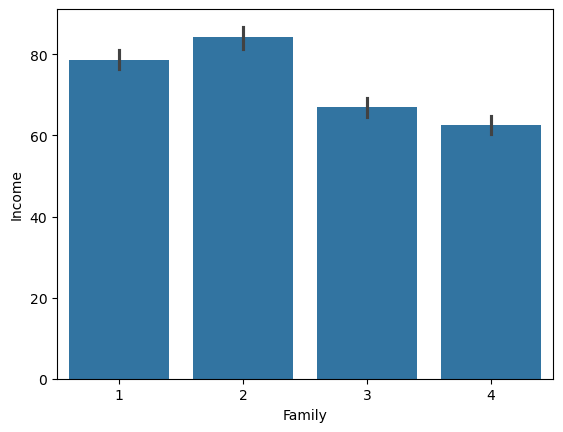

In [22]:
sns.barplot(data = data, x = 'Family', y = 'Income')

In [30]:
from sklearn.model_selection import train_test_split

In [44]:
X = data.drop(columns = ['CreditCard'])
y = data['CreditCard']

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42) 

In [46]:
from sklearn.svm import SVC

In [47]:
svc = SVC()

In [48]:
svc.fit(X_train,y_train)

SVC()

In [49]:
pred = svc.predict(X_test)

In [50]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[1073    0]
 [ 427    0]]


              precision    recall  f1-score   support

           0       0.72      1.00      0.83      1073
           1       0.00      0.00      0.00       427

    accuracy                           0.72      1500
   macro avg       0.36      0.50      0.42      1500
weighted avg       0.51      0.72      0.60      1500



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
from sklearn.model_selection import GridSearchCV

In [106]:
param_grid = {'C': [1,10,100,1000,10000], 'gamma': [1,0.1,0.01,0.001,0.0001]}

In [107]:
grid = GridSearchCV(SVC(),param_grid, verbose = 2)

In [108]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .......................................C=1, gamma=1; total time=   0.2s
[CV] END .......................................C=1, gamma=1; total time=   0.2s
[CV] END .......................................C=1, gamma=1; total time=   0.2s
[CV] END .......................................C=1, gamma=1; total time=   0.2s
[CV] END .......................................C=1, gamma=1; total time=   0.1s
[CV] END .....................................C=1, gamma=0.1; total time=   0.2s
[CV] END .....................................C=1, gamma=0.1; total time=   0.2s
[CV] END .....................................C=1, gamma=0.1; total time=   0.2s
[CV] END .....................................C=1, gamma=0.1; total time=   0.2s
[CV] END .....................................C=1, gamma=0.1; total time=   0.2s
[CV] END ....................................C=1, gamma=0.01; total time=   0.1s
[CV] END ....................................C=

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [109]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001}

In [110]:
grid.best_estimator_

SVC(C=1000, gamma=0.0001)

In [111]:
grid_pred = grid.predict(X_test)

In [112]:
grid_pred

array([0, 0, 0, ..., 0, 0, 1])

In [113]:
print(confusion_matrix(y_test, grid_pred))
print('\n')
print(classification_report(y_test, grid_pred))

[[1050   23]
 [ 357   70]]


              precision    recall  f1-score   support

           0       0.75      0.98      0.85      1073
           1       0.75      0.16      0.27       427

    accuracy                           0.75      1500
   macro avg       0.75      0.57      0.56      1500
weighted avg       0.75      0.75      0.68      1500

